<a href="https://colab.research.google.com/github/Jules-gatete/ML_Summative/blob/main/Daily_Water_Intake_Prediction_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

**loading the Data**

In [62]:
# Load the dataset
file_path = "/content/gym_members_exercise_tracking.csv"
data = pd.read_csv(file_path)

# check the first few rows of the dataset
data.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [63]:
# Select relevant features for training (ensure only 5 features are used)
features = ['Age', 'Gender', 'Height (m)', 'Weight (kg)', 'Workout_Type']
target = 'Water_Intake (liters)'


In [64]:
# Prepare data
X = data[features]
y = data[target]

# Convert to DataFrame (ensure it's a DataFrame)
X = pd.DataFrame(X, columns=features)


In [65]:
#description of data
data.describe()


Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [66]:
# get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [67]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


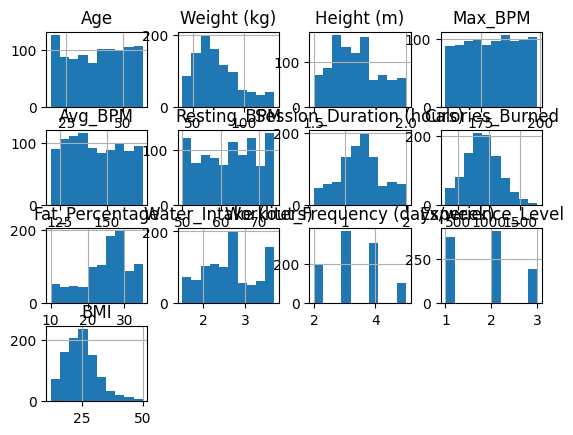

In [68]:
# Plot the distribution of the data
data.hist()
plt.show()

In [69]:
# Get the categorical and numerical data
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(include=['float64', 'int64'])

print(categorical_data.head())

   Gender Workout_Type
0    Male         Yoga
1  Female         HIIT
2  Female       Cardio
3    Male     Strength
4    Male     Strength


In [70]:
label_encoder = LabelEncoder()

In [71]:
# see the new data
data.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [72]:
# Encode the categorical variables
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

In [73]:
# Display changes
print(data.head())
print(data.dtypes)

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

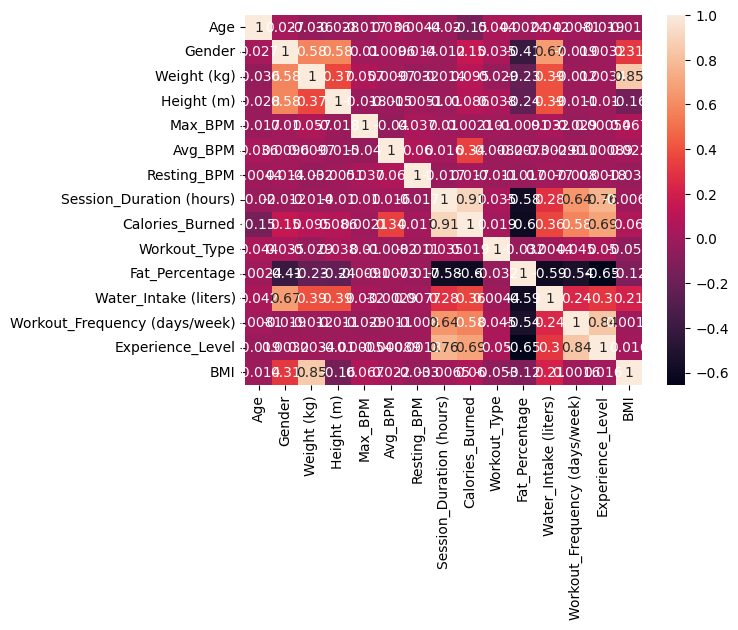

In [74]:
# Check the correlation of the data
sns.heatmap(data.corr(), annot=True)
plt.show()

In [75]:
# Get the features and target variables
X = data.drop('Water_Intake (liters)', axis=1)
y = data['Water_Intake (liters)']

In [76]:
# MinMax Scaling (optional - use only if needed)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [77]:
# Standard Scaling (recommended for most algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.joblib')  # Save the scaler

['scaler.joblib']

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training data
print(X_train.shape)

(681, 14)


In [79]:
# Preprocessing: Impute missing values and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Height (m)', 'Weight (kg)']),  # Imputes missing numeric values
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Workout_Type'])  # OneHot encodes categorical features and ignores unknown categories
    ])


In [80]:
def calculate_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-Squared (R²): {r2:.4f}")
    return mae, mse, rmse, r2

In [81]:
# 1. Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_pred = decision_tree.predict(X_test)

# R-squared error for Decision Tree
decision_r2 = metrics.r2_score(y_test, decision_pred)
print("Decision Tree - R squared error:", decision_r2)

# Mean Squared Error (MSE) for Decision Tree
decision_mse = metrics.mean_squared_error(y_test, decision_pred)
print("Decision Tree - Mean Squared Error (MSE):", decision_mse)

# Root Mean Squared Error (RMSE) for Decision Tree
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree - Root Mean Squared Error (RMSE):", decision_rmse)

Decision Tree - R squared error: 0.2914775893897603
Decision Tree - Mean Squared Error (MSE): 0.2558561643835617
Decision Tree - Root Mean Squared Error (RMSE): 0.5058222656067659


In [82]:
#Linear Regression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

# R-squared error for Linear Regression
linear_r2 = metrics.r2_score(y_test, linear_pred)
print("Linear Regression - R squared error:", linear_r2)

# Mean Squared Error (MSE) for Linear Regression
linear_mse = metrics.mean_squared_error(y_test, linear_pred)
print("Linear Regression - Mean Squared Error (MSE):", linear_mse)

# Root Mean Squared Error (RMSE) for Linear Regression
linear_rmse = np.sqrt(linear_mse)
print("Linear Regression - Root Mean Squared Error (RMSE):", linear_rmse)

Linear Regression - R squared error: 0.5857127006990057
Linear Regression - Mean Squared Error (MSE): 0.14960424365502087
Linear Regression - Root Mean Squared Error (RMSE): 0.3867870779318007


In [83]:
# 3. Random Forest Regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_pred = random_forest.predict(X_test)

# R-squared error for Random Forest
random_r2 = metrics.r2_score(y_test, random_pred)
print("Random Forest - R squared error:", random_r2)

# Mean Squared Error (MSE) for Random Forest
random_mse = metrics.mean_squared_error(y_test, random_pred)
print("Random Forest - Mean Squared Error (MSE):", random_mse)

# Root Mean Squared Error (RMSE) for Random Forest
random_rmse = np.sqrt(random_mse)
print("Random Forest - Root Mean Squared Error (RMSE):", random_rmse)

Random Forest - R squared error: 0.6014835327711574
Random Forest - Mean Squared Error (MSE): 0.14390920205479446
Random Forest - Root Mean Squared Error (RMSE): 0.3793536635578922


In [84]:


# Preprocessing: Encode categorical features and handle missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Age', 'Height (m)', 'Weight (kg)']),  # Handle numerical features
        ('cat', OneHotEncoder(), ['Gender', 'Workout_Type'])  # One-hot encode categorical features
    ])

In [85]:
# Build the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42)) ])

In [86]:
# Fit the model pipeline on the training data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'Height (m)',
                                                   'Weight (kg)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender',
                                                   'Workout_Type'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [87]:
# Save the trained model using joblib
import joblib
joblib.dump(model_pipeline, 'random_forest_model.joblib')

print("Model trained and saved successfully.")

Model trained and saved successfully.


In [89]:
# Recreate LabelEncoder and fit it on all categories (must match training data)
label_encoder_gender = LabelEncoder()
label_encoder_workout_type = LabelEncoder()

# These should have been fitted on the entire dataset during training
# Assuming you know the categories present in your training data
label_encoder_gender.fit(['male', 'female'])
label_encoder_workout_type.fit(['sedentary', 'light', 'moderate', 'heavy'])

# Load the trained Random Forest model (if saved previously)
# Assuming the model was saved as 'random_forest_model.joblib'
try:
    model_pipeline = joblib.load('random_forest_model.joblib')  # Load your trained RandomForest model
    print("Model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file not found. Please ensure the model is saved correctly.")

# Function to validate user inputs
def get_valid_input(prompt, min_val, max_val, dtype=float):
    while True:
        try:
            value = dtype(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"Value must be between {min_val} and {max_val}. Try again.")
        except ValueError:
            print("Invalid input. Please enter a number.")

# Prompt user for input
print("\nEnter the following details to predict your daily water intake:")

age = get_valid_input("Age (0-120 years): ", 0, 120, int)

gender = input("Gender (Male/Female): ").strip().lower()
while gender not in ['male', 'female']:
    print("Invalid input. Please enter 'Male' or 'Female'.")
    gender = input("Gender (Male/Female): ").strip().lower()

# Encode gender input
encoded_gender = label_encoder_gender.transform([gender])[0]

height = get_valid_input("Height (in meters, 0.5-2.5): ", 0.5, 2.5)

weight = get_valid_input("Weight (in kg, 10-300): ", 10, 300)

work_type = input("Workout Type (Sedentary/Light/Moderate/Heavy): ").strip().lower()
while work_type not in ['sedentary', 'light', 'moderate', 'heavy']:
    print("Invalid input. Please enter 'Sedentary', 'Light', 'Moderate', or 'Heavy'.")
    work_type = input("Workout Type (Sedentary/Light/Moderate/Heavy): ").strip().lower()

# Encode workout type input
encoded_work_type = label_encoder_workout_type.transform([work_type])[0]

# Prepare user input for prediction
input_data = {
    'Age': [age],
    'Height (m)': [height],
    'Weight (kg)': [weight],
    'Gender': [encoded_gender],  # Use encoded value for gender
    'Workout_Type': [encoded_work_type]  # Use encoded value for workout type
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Predict the target value (daily water intake)
try:
    prediction = model_pipeline.predict(input_df)  # Use the Random Forest model to make predictions
    print(f"\nPredicted daily water intake: {prediction[0]:.2f} liters")
except Exception as e:
    print(f"An error occurred during prediction: {e}")


Model loaded successfully!

Enter the following details to predict your daily water intake:
Age (0-120 years): 34
Gender (Male/Female): male
Height (in meters, 0.5-2.5): 1.5
Weight (in kg, 10-300): 67
Workout Type (Sedentary/Light/Moderate/Heavy): heavy

Predicted daily water intake: 3.23 liters
